# CASE STUDY : la Vigotte

## Imports

In [1]:
from extractor import *
from stations import *
from species import *
from empirical_model import *
from linear_regression import *
from occupancy_detection import *
from maxent import *
from visualization import *

## Extraction of climatic data

In [2]:
# la_vigotte = pd.DataFrame.from_dict({'lon': [6.592], 'lat': [47.966]})
# la_vigotte.to_csv("la_vigotte.csv", index=False)

# la_vigotte = Extractor("la_vigotte.csv", "la_vigotte_climate.csv")
# la_vigotte.extract()

stations = Extractor("stations.csv", "stations_climate.csv", id_stations_name="id")
stations.extract()

test = Extractor("test.csv", "test_climate.csv", id_species_name="plt_id_cfvvf", id_stations_name="id")
test.extract()

five_species = Extractor("five_species.csv", "five_species_climate.csv", id_species_name="id_pasa", id_stations_name="id_clim")
five_species.extract()

Extraction completed
        lon      lat  id  Rainfall January  Rainfall February  Rainfall March  \
0  5.816622  46.8828   1             130.2              117.8           125.3   
1  5.818422  46.8801   2             130.2              117.8           125.3   
2  5.886822  46.9638   3             128.1              116.8           125.5   
3  4.769022  47.1258   4              79.4               62.3            66.0   
4  4.783422  47.1150   5              77.1               60.6            64.2   

   Rainfall April  Rainfall May  Rainfall June  Rainfall July  ...  \
0           122.4         150.8          120.9          118.7  ...   
1           122.4         150.8          120.9          118.7  ...   
2           121.2         150.0          122.6          119.7  ...   
3            75.5          99.7           83.9           81.4  ...   
4            74.3          98.0           82.2           79.5  ...   

   Tmin March  Tmin April  Tmin May  Tmin June  Tmin July  Tmin August 

## Creation of the species objects

In [3]:
id_list = [2707, 2708, 2709, 2710, 2711, 2714, 2715, 2718, 2719, 2720,
            2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2731, 2732,
            2735, 2736, 2737, 2738, 2739, 2840, 2844, 2845, 2847, 2848,
            2850, 2852, 2854, 2855, 2856, 2857, 2860, 2861, 3611, 3613,
            3615, 3616, 3618, 3620, 3621, 3626, 3628, 3629, 3631, 3632,
            3633, 3634, 3636, 3638, 9027, 9030, 9031, 9032, 9033, 9034,
            9035, 9036, 9037, 9038, 9039, 9040, 9042, 9043, 9044, 9045,
            9046, 9047]

In [4]:
species_list = []
for id_species in id_list[: 3]:
    s = Species("test_climate.csv", id_species_name="plt_id_cfvvf", id_species=id_species, id_stations_name="id")
    species_list.append(s)
    print(s)

| Name: ANDROMEDA POLIFOLIA 
| ID (plt_id_cfvvf): 2707
| Number of samples: 752
| Name: ARBUTUS UNEDO L.    
| ID (plt_id_cfvvf): 2708
| Number of samples: 2775
| Name: ARCTOSTAPHYLOS ALPIN
| ID (plt_id_cfvvf): 2709
| Number of samples: 170


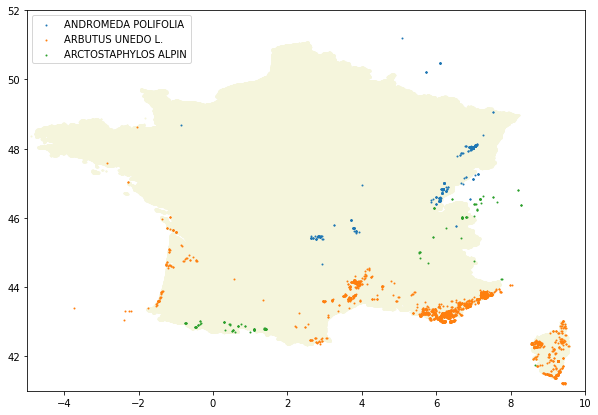

In [5]:
Visualization.plot_area(species_list)

## Test for la Vigotte

In [6]:
test = pd.read_csv("test_climate.csv", sep=",")
stations = pd.read_csv("stations_climate.csv", sep=",")

In [7]:
stations.describe()

,lon,lat,id,Rainfall January,Rainfall February,Rainfall March,Rainfall April,Rainfall May,Rainfall June,Rainfall July,...,Tmin March,Tmin April,Tmin May,Tmin June,Tmin July,Tmin August,Tmin September,Tmin October,Tmin November,Tmin December
count,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,...,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000
mean,3.567636,38.744975,109178.927322,57.300469,45.546938,48.491160,53.584553,60.040683,48.155588,42.567052,...,-103.176056,-101.810182,-99.358282,-97.316240,-95.803243,-95.790915,-97.555153,-99.488161,-102.289253,-103.946548
std,58.249941,1412.536563,63179.406590,52.023665,41.614892,44.588386,48.511567,54.227040,45.157341,42.249094,...,133.608947,134.679089,136.601632,138.203534,139.392170,139.403032,138.018513,136.502285,134.309211,133.010743
min,-27000.362778,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000
25%,2.337222,0.000000,54592.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000
50%,2.929422,44.872200,108673.500000,66.500000,53.000000,55.900000,57.700000,65.900000,50.200000,44.300000,...,-1.150000,1.150000,5.350000,8.850000,11.350000,11.350000,8.350000,5.150000,0.450000,-2.150000
75%,6.139722,47.630700,162697.750000,89.900000,70.300000,75.100000,88.700000,99.300000,80.100000,74.300000,...,2.950000,5.150000,9.150000,12.250000,14.650000,14.650000,11.650000,8.550000,4.250000,1.650000
max,311.937222,470251.800000,221533.000000,253.000000,212.000000,227.800000,234.700000,259.700000,271.500000,259.200000,...,11.350000,12.950000,16.250000,19.550000,22.550000,23.250000,20.750000,17.850000,14.150000,11.550000


In [8]:
test.describe()

,lon,lat,plt_id_cfvvf,id,Rainfall January,Rainfall February,Rainfall March,Rainfall April,Rainfall May,Rainfall June,...,Tmin March,Tmin April,Tmin May,Tmin June,Tmin July,Tmin August,Tmin September,Tmin October,Tmin November,Tmin December
count,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,...,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000,233514.000000
mean,4.010495,39.464920,4101.604439,109954.328229,62.004324,48.596326,51.622805,58.323924,64.203977,51.104031,...,-97.078869,-95.629296,-93.040127,-90.874353,-89.279864,-89.272472,-91.150415,-93.185946,-96.140705,-97.876515
std,55.951325,1356.946549,2376.647096,64085.237610,53.886107,42.868004,45.756706,49.525640,54.825281,45.291319,...,131.739745,132.821997,134.755564,136.373876,137.567090,137.573675,136.169628,134.648483,132.444329,131.148595
min,-27000.362778,0.000000,2707.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000
25%,2.337222,42.413400,2737.000000,59216.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000,-273.150000
50%,3.770022,44.479800,2850.000000,104152.500000,72.300000,53.300000,56.600000,63.900000,70.800000,54.200000,...,-1.050000,1.250000,5.450000,8.950000,11.450000,11.450000,8.350000,5.250000,0.450000,-2.050000
75%,6.712122,47.735100,3628.000000,163470.000000,95.000000,74.500000,79.300000,97.000000,104.400000,82.800000,...,2.750000,4.950000,8.950000,12.150000,14.550000,14.450000,11.450000,8.450000,4.250000,1.550000
max,15.599622,470251.800000,9047.000000,221533.000000,245.900000,198.000000,212.400000,234.700000,244.000000,253.500000,...,11.250000,12.950000,16.250000,19.550000,22.550000,23.250000,20.750000,17.850000,14.150000,11.550000


In [9]:
la_vigotte = pd.read_csv("la_vigotte_climate.csv", sep=",")

In [11]:
background = pd.read_csv("stations_climate.csv", sep=",")
#background = background.dropna()
background["id"] = background["id"].astype(int)

for s in species_list:
    presence = s.presence
    ids_stations = s.ids_stations.values
    x_presence = presence.values
    
    absence = background[~background['id'].isin(ids_stations)]
    print(len(absence))
    
    em_model = EmpiricalModel()
    em_model.fit(presence)
    em_prediction = em_model.predict(la_vigotte)

215498  background points
214746


IndexError: list index out of range

In [ ]:
"""
x = [1, 3, 13, 16, 25, 28]
y = [37 + 28/60, 38.5, 36 + 52/60, 37 + 25/60, 36 + 22/60, 35 + 50/60]
plt.scatter(x, y)
plt.ylim((35, 40))
plt.show()
"""